# **Auto Insurance; Fraud Claim Prediction Model**

Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain. Fraud may be committed at different points in the transaction by applicants, policyholders, third-party claimants, or professionals who provide services to claimants. Insurance agents and company employees may also commit insurance fraud. Common frauds include “padding,” or inflating claims; misrepresenting facts on an insurance application; submitting claims for injuries or damage that never occurred; and staging accidents.

Auto insurance fraud ranges from misrepresenting facts on insurance applications and inflating insurance claims to staging accidents and submitting claim forms for injuries or damage that never occurred, to false reports of stolen vehicles.

***Source***: https://www.iii.org/article/background-on-insurance-fraud

# **Problem Statement**
” Our objective is to create an interface for insurance company with Machine Learning model in the backend, to identify the fraud claims in the automobile industry.”

**H0**: "*Give data is fraud*"

**H1**: "*Given data is genuine*"

In [1]:
import numpy as np #Linear Algebra library
import pandas as pd #Data Analytical library
import matplotlib.pyplot as plt #Data Visualisation Library
import seaborn as sns #Statistical Visualisation Library

### **Loading the Data**
Using pandas library, we imported insurance dataset.

***Source***: https://www.kaggle.com/roshansharma/insurance-claim

In [2]:
df=pd.read_csv("/Users/manu/SJC/Sem 2/MVS-Python/insurance_claims.csv")
df_copy = df.copy()
pd.set_option('display.max_columns', 100)
df_copy

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
df_copy.shape

(1000, 39)

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [6]:
df_copy.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
policy_bind_date,1000,951,05-08-1992,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


# Data Pre Processing
-  Data cleaning
-  Data Transformation
-  Data Integration

## 1. Data Cleaning

In [7]:
#replacing '?' with NAN

df_copy = df_copy[df_copy != '?']
df_copy.shape

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(1000, 39)

In [8]:
df_copy.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
#replacing null values with mode of the respective columns

df_copy['collision_type'].fillna(df_copy['collision_type'].mode()[0],inplace = True)
df_copy['property_damage'].fillna(df_copy['property_damage'].mode()[0],inplace = True)
df_copy['police_report_available'].fillna(df_copy['police_report_available'].mode()[0],inplace = True)

In [10]:
df_copy.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [11]:
df_copy.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

## 2. Data Transformation

In [12]:
df_copy['policy_bind_date'] = pd.to_datetime(df_copy['policy_bind_date'])
df_copy['incident_date'] = pd.to_datetime(df_copy['incident_date'])

# EDA 
- Descriptive Statistics
- Outlier Analysis
- Data Visualisation

## 1. Descriptive Statistics

In [13]:
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [14]:
df_copy.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354


## 2. Outlier Analysis

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <a list of 18 Text major ticklabel objects>)

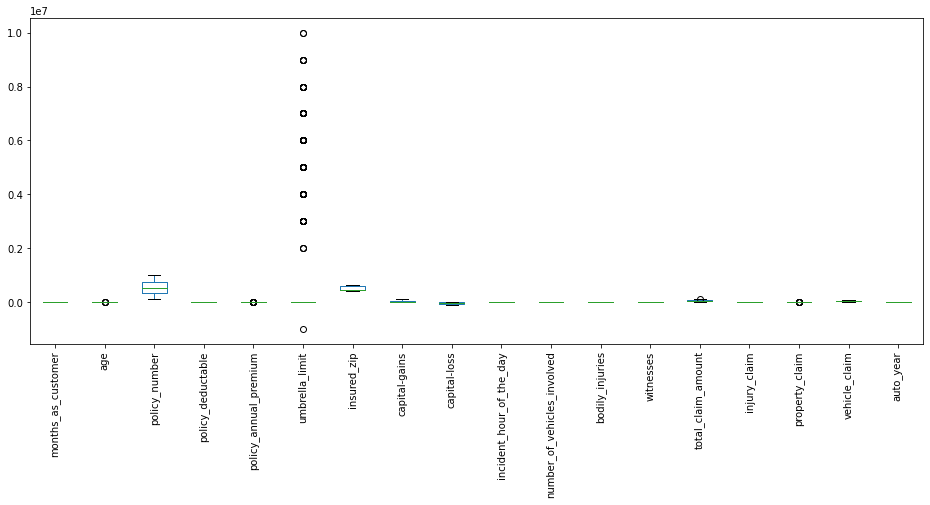

In [15]:
df_copy.plot.box(figsize = (16,6))
plt.xticks(rotation = 90)

In [16]:
#import sklearn.preprocessing as pre
#lb=pre.LabelEncoder()

#df_copy['fraud_reported']=lb.fit_transform(df_copy['fraud_reported'])

Text(0.5, 1.0, 'Correlation matrix for numerical features')

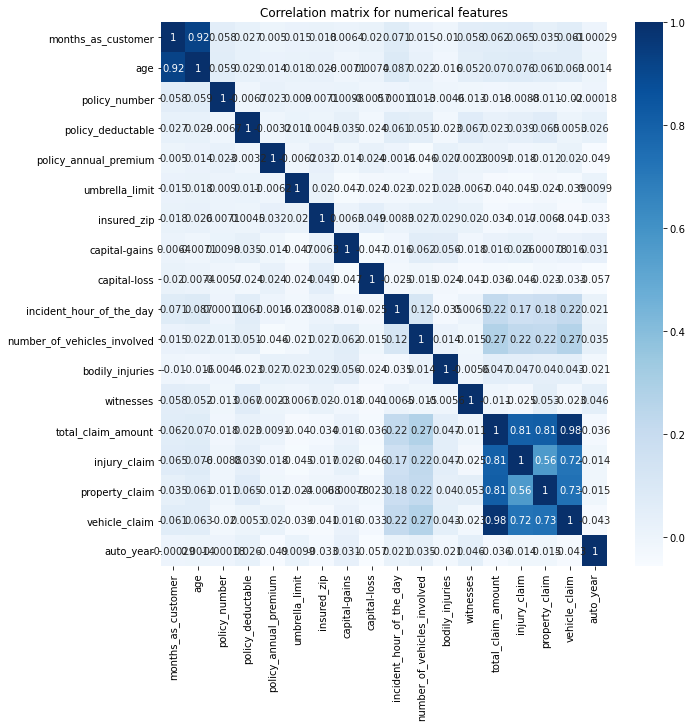

In [17]:
#correlation matrix for numerical variables

plt.figure(figsize = (10, 10))
sns.heatmap(df_copy.corr(), annot = True, cmap = 'Blues')
plt.title('Correlation matrix for numerical features')

## 3. Data Visualisation

In [18]:
#function for crosstabs
def cross_tab(x,y):
    crtab = pd.crosstab(df_copy[x], df_copy[y])
    return crtab


N    753
Y    247
Name: fraud_reported, dtype: int64


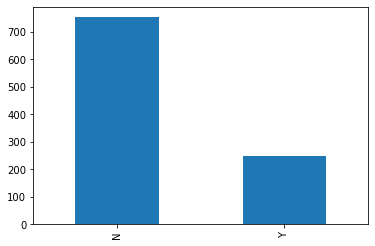

In [19]:
#Number of fraud claim

p = df_copy['fraud_reported'].value_counts()
print(p)
df_copy['fraud_reported'].value_counts().plot.bar()


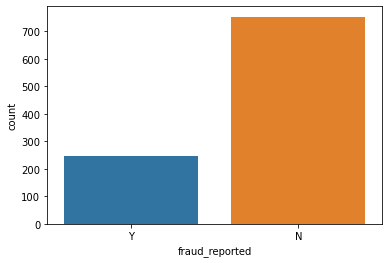

In [20]:
sns.countplot(x=df_copy['fraud_reported'])

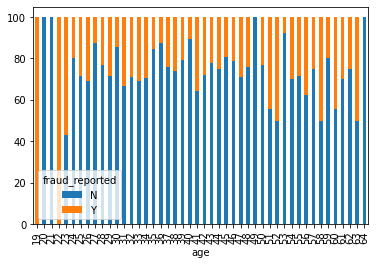

In [21]:
#Age v/s fraud reported


table=pd.crosstab(df_copy.age,df_copy.fraud_reported)
stacked_data = table.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

In [22]:
#insured sex v/s fraud reported

cross_tab('insured_sex','fraud_reported')

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,342,121


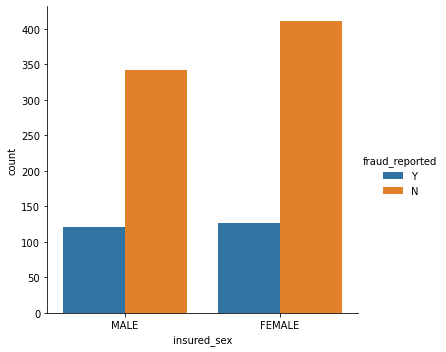

In [23]:
sns.catplot(data=df_copy,x='insured_sex',hue='fraud_reported',kind='count')

In [24]:
#policy state v/s fraud reported

cross_tab('policy_state','fraud_reported')

fraud_reported,N,Y
policy_state,,
IL,261,77
IN,231,79
OH,261,91


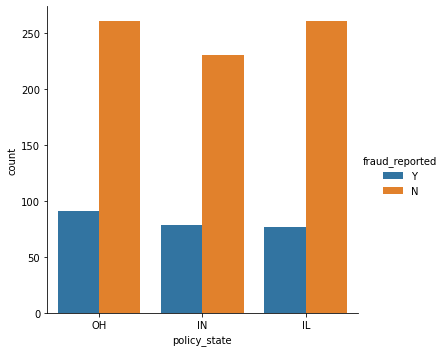

In [25]:
sns.catplot(data=df_copy,x='policy_state',hue='fraud_reported',kind='count')

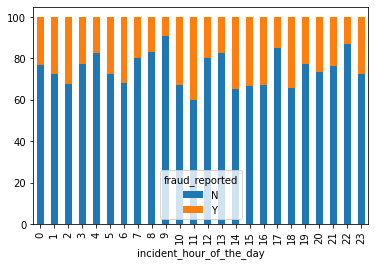

In [26]:
#Hour in which incident happend 

table1=pd.crosstab(df_copy['incident_hour_of_the_day'],df_copy['fraud_reported'])
stacked_data = table1.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)

In [27]:
#Hour in which incident happend 

cross_tab('incident_hour_of_the_day','fraud_reported')

fraud_reported,N,Y
incident_hour_of_the_day,,
0,40,12
1,21,8
2,21,10
3,41,12
4,38,8
5,24,9
6,30,14
7,32,8
8,30,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

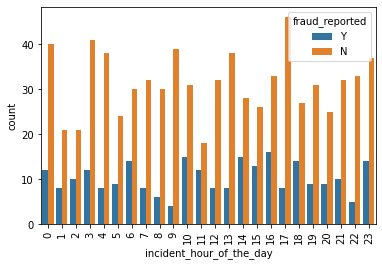

In [28]:
sns.countplot(data = df_copy,x ='incident_hour_of_the_day',hue='fraud_reported')
plt.xticks(rotation = 90)

In [29]:
#incident type v/s fraud reported

cross_tab('incident_type','fraud_reported')

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,305,114
Parked Car,76,8
Single Vehicle Collision,286,117
Vehicle Theft,86,8


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

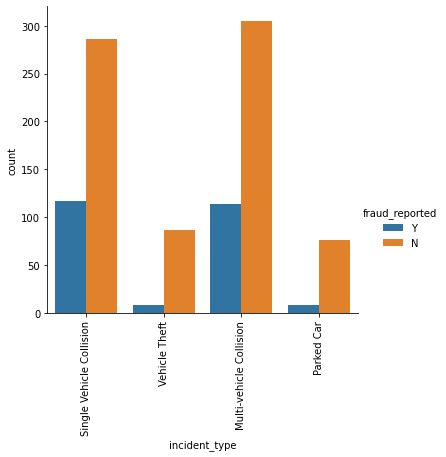

In [30]:
sns.catplot(data=df_copy,x='incident_type',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [31]:
#insured education level v/s fraud reported

cross_tab('insured_education_level','fraud_reported')

fraud_reported,N,Y
insured_education_level,,
Associate,111,34
College,90,32
High School,124,36
JD,119,42
MD,106,38
Masters,111,32
PhD,92,33


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

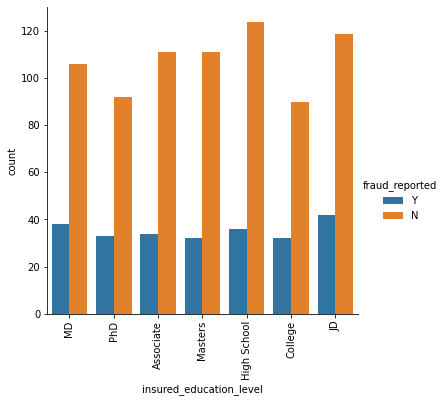

In [32]:
sns.catplot(data=df_copy,x='insured_education_level',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [33]:
#insured occupation v/s fraud reported 

cross_tab('insured_occupation','fraud_reported')

fraud_reported,N,Y
insured_occupation,,
adm-clerical,54,11
armed-forces,52,17
craft-repair,52,22
exec-managerial,48,28
farming-fishing,37,16
handlers-cleaners,43,11
machine-op-inspct,71,22
other-service,59,12
priv-house-serv,59,12


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

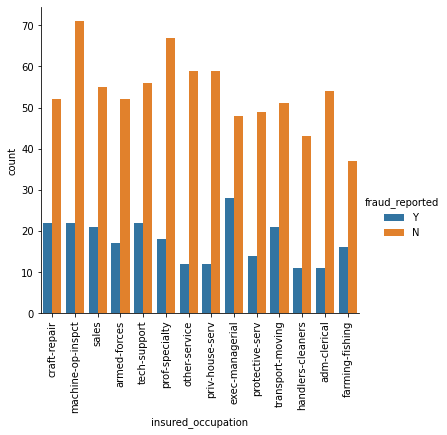

In [34]:
sns.catplot(data=df_copy,x='insured_occupation',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [35]:
#insured hobbies v/s fraud reported

cross_tab('insured_hobbies','fraud_reported')

fraud_reported,N,Y
insured_hobbies,,
base-jumping,36,13
basketball,28,6
board-games,34,14
bungie-jumping,47,9
camping,50,5
chess,8,38
cross-fit,9,26
dancing,38,5
exercise,46,11


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

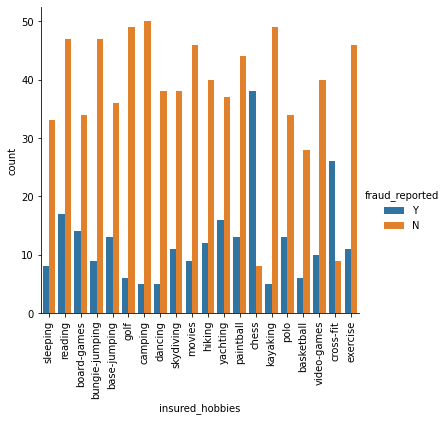

In [36]:
sns.catplot(data=df_copy,x='insured_hobbies',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [37]:
#insured relationship v/s fraud reported

cross_tab('insured_relationship','fraud_reported')

fraud_reported,N,Y
insured_relationship,,
husband,135,35
not-in-family,129,45
other-relative,125,52
own-child,144,39
unmarried,107,34
wife,113,42


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

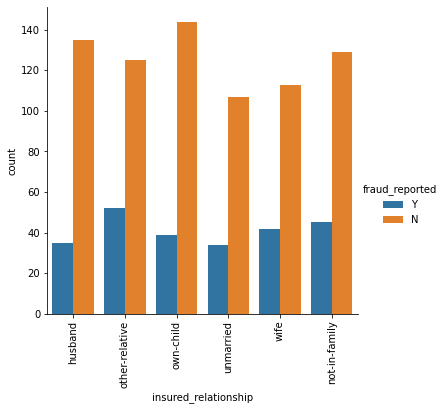

In [38]:
sns.catplot(data=df_copy,x='insured_relationship',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [39]:
#incident type v/s fraud reported

cross_tab('incident_type','fraud_reported')

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,305,114
Parked Car,76,8
Single Vehicle Collision,286,117
Vehicle Theft,86,8


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

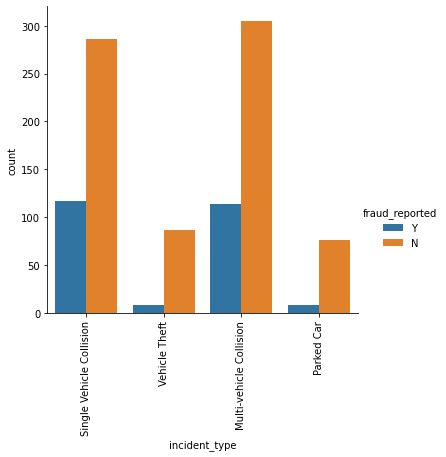

In [40]:
#incident type v/s fraud reported

sns.catplot(data=df_copy,x='incident_type',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [41]:
#collision type v/s fraud reported

cross_tab('collision_type','fraud_reported')

fraud_reported,N,Y
collision_type,,
Front Collision,184,70
Rear Collision,363,107
Side Collision,206,70


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

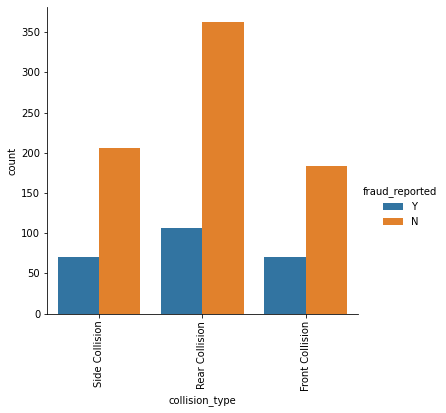

In [42]:
sns.catplot(data=df_copy,x='collision_type',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [43]:
#incident severity v/s fraud reported

cross_tab('incident_severity','fraud_reported')

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

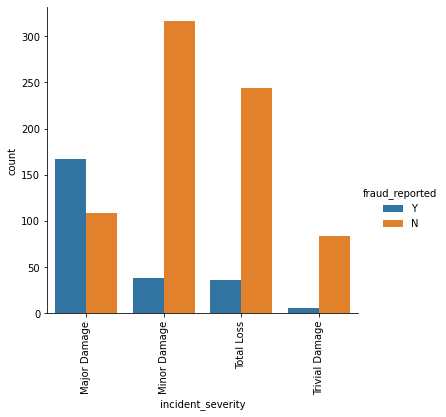

In [44]:
sns.catplot(data=df_copy,x='incident_severity',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

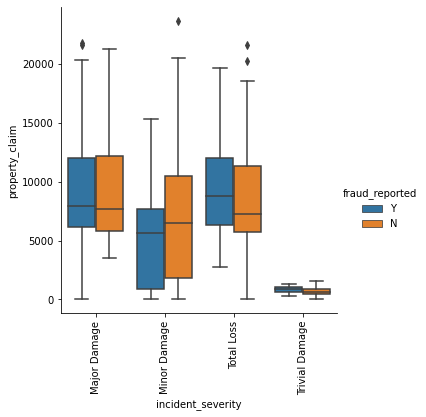

In [45]:
sns.catplot(data =df_copy, x="incident_severity", y="property_claim",hue='fraud_reported',kind='box')
plt.xticks(rotation = 90)

In [46]:
#authorities contacted v/s fraud reported

cross_tab('authorities_contacted','fraud_reported')

fraud_reported,N,Y
authorities_contacted,,
Ambulance,139,57
Fire,163,60
None,85,6
Other,135,63
Police,231,61


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

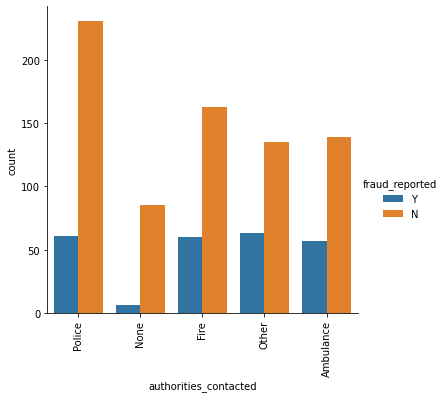

In [47]:
sns.catplot(data=df_copy,x='authorities_contacted',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [48]:
cross_tab('police_report_available','fraud_reported')

fraud_reported,N,Y
police_report_available,,
NO,511,175
YES,242,72


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

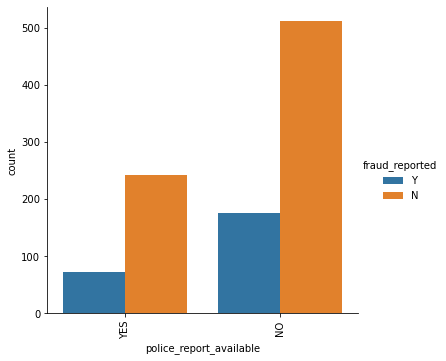

In [49]:

sns.catplot(data=df_copy,x='police_report_available',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

In [50]:
#incident state v/s fraud reported

cross_tab('incident_state','fraud_reported')

fraud_reported,N,Y
incident_state,,
NC,76,34
NY,204,58
OH,13,10
PA,22,8
SC,175,73
VA,85,25
WV,178,39


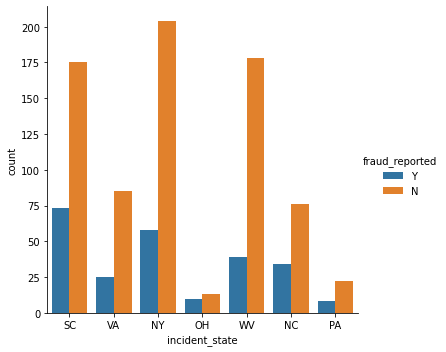

In [51]:
sns.catplot(data=df_copy,x='incident_state',hue='fraud_reported',kind='count')

In [52]:
#incident withness v/s fraud reported

cross_tab('witnesses','fraud_reported')

fraud_reported,N,Y
witnesses,,
0,199,50
1,195,63
2,176,74
3,183,60


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

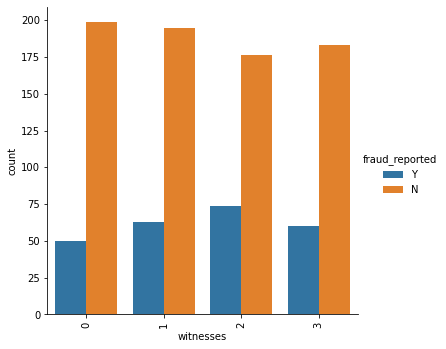

In [53]:
sns.catplot(data=df_copy,x='witnesses',hue='fraud_reported',kind='count')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

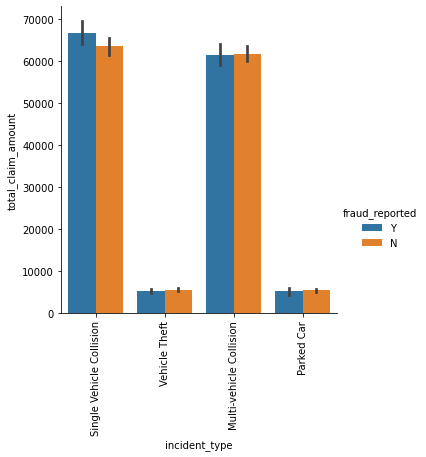

In [54]:
#incident type v/s total claim amount WRT fraud reported

sns.catplot(data=df_copy,x='incident_type',y='total_claim_amount',hue='fraud_reported',kind='bar')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Fraud reported VS vechile year')

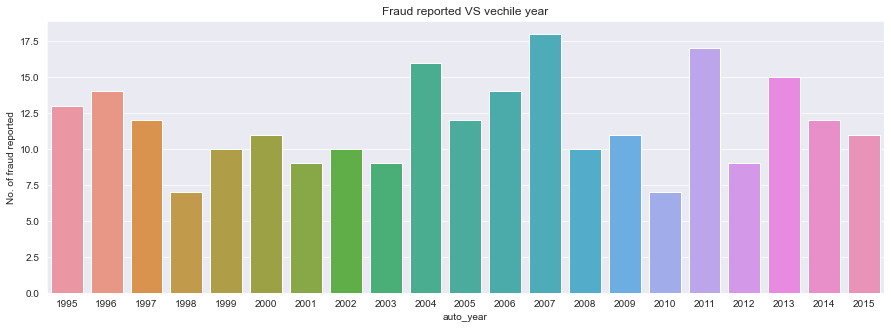

In [55]:


plt.figure(figsize = (15, 5))
df_temp = df_copy[df_copy.fraud_reported == 'Y']
sns.set_style('darkgrid')
sns.countplot(x = 'auto_year', data = df_temp)
plt.ylabel('No. of fraud reported')
plt.title('Fraud reported VS vechile year')